<a href="https://colab.research.google.com/github/adiyadav255/IoT-air-quality-and-weather-node/blob/main/aqi_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

X_train = pd.read_csv('/content/drive/My Drive/ML_Data/X_train_scaled.csv')
X_test = pd.read_csv('/content/drive/My Drive/ML_Data/X_test_scaled.csv')
y_train = pd.read_csv('/content/drive/My Drive/ML_Data/y_train.csv')
y_test = pd.read_csv('/content/drive/My Drive/ML_Data/y_test.csv')

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"R²: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
R²: 0.747
MAE: 19.704
RMSE: 26.518


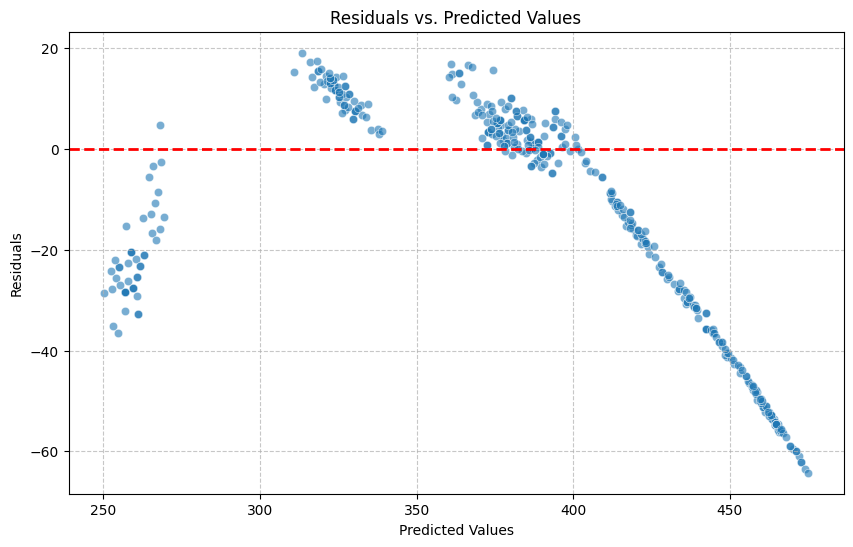

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred.flatten(), y=residuals.values.flatten(), alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2) # Add a horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

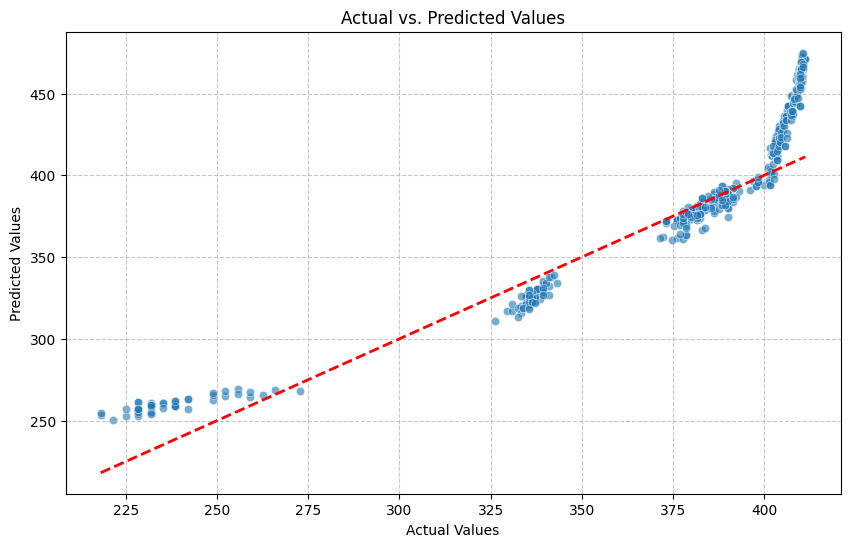

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred.flatten(), alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Red dashed line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [9]:
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [[133.59694591 -86.0035514 ]]
Intercept: [349.86281917]
